First, we will import the libraries we will use

In [16]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import pandas_datareader.data as web
import pandas_datareader as pdr
from datetime import datetime

We will create a list with the assets we will compare, which in this case are the oil january 22 futures and the NZDCAD currency pair. 

In [17]:
my_list = ['NZDCAD=X','CL=F']

We state the time we will compare, we will use 10 years for relevant data, where we will see various market scenarios. 

In [18]:

end = datetime.now()


start = datetime(end.year-10,end.month,end.day) 

We use globals method to get our asset prices from the yahoo finance API

In [19]:
for currency in my_list:
    globals()[currency.replace('=X', "")] = web.DataReader(currency,'yahoo',start,end) 
    
for commodity in my_list:
    globals()[commodity.replace('=F', "")] = web.DataReader(commodity,'yahoo',start,end) 

We will print the NZDCAD currency price info. Then same for the oil futures in a dataframe format

In [6]:
NZDCAD.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-17,0.881791,0.87730,0.878120,0.87790,0.0,0.87790
2021-11-18,0.888742,0.88190,0.882988,0.88305,0.0,0.88305
2021-11-19,0.887430,0.88450,0.887358,0.88690,0.0,0.88690
2021-11-22,0.886330,0.88310,0.884380,0.88439,0.0,0.88439
2021-11-23,0.883900,0.87961,0.883210,0.88163,0.0,0.88163


In [7]:
CL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-17,80.690002,77.690002,80.540001,78.360001,174471.0,78.360001
2021-11-18,79.360001,77.080002,78.339996,79.010002,83984.0,79.010002
2021-11-19,79.919998,75.370003,78.760002,76.099998,623448.0,76.099998
2021-11-22,77.160004,74.760002,75.750000,76.750000,623448.0,76.750000
2021-11-23,78.860001,75.300003,76.459999,78.639999,475081.0,78.639999


We will see the the adjusted closing prices of both assets

In [8]:
close_df = web.DataReader(my_list,'yahoo',start,end)['Adj Close']

We will print both assets

In [9]:
close_df.tail()

Symbols,NZDCAD=X,CL=F
Date,,
2021-11-17,0.87790,78.360001
2021-11-18,0.88305,79.010002
2021-11-19,0.88690,76.099998
2021-11-22,0.88439,76.750000
2021-11-23,0.88165,78.639999


Then we will print the price differences or changes each day

In [10]:
rets_df = close_df.pct_change()

In [20]:
rets_df.tail()

Symbols,NZDCAD=X,CL=F
Date,,
2021-11-17,-0.003179,-0.029718
2021-11-18,0.005866,0.008295
2021-11-19,0.004360,-0.036831
2021-11-22,-0.002830,0.008541
2021-11-23,-0.003098,0.024625


Let's try creating a scatterplot to visualize any correlations between our assets' adjusted closing price changes per day. 

C:\Users\SANTIAGO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


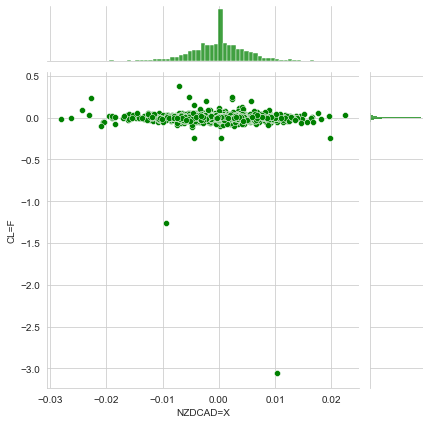

In [21]:
sns.jointplot("NZDCAD=X","CL=F",rets_df,kind='scatter',color='green')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

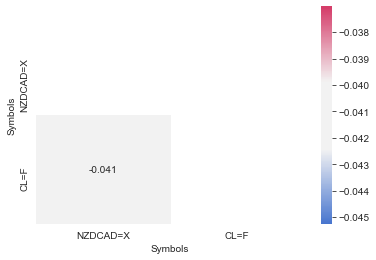

In [23]:
corr = rets_df.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,cmap =sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

<AxesSubplot:xlabel='Date'>

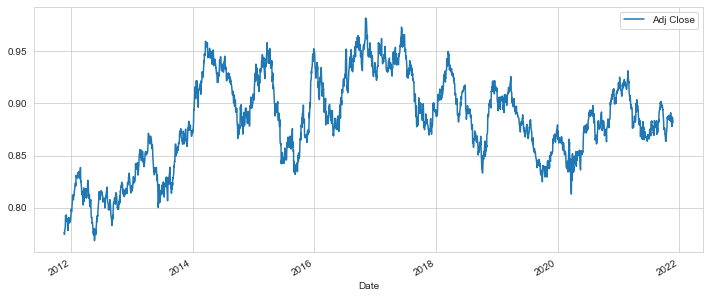

In [14]:
NZDCAD['Adj Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

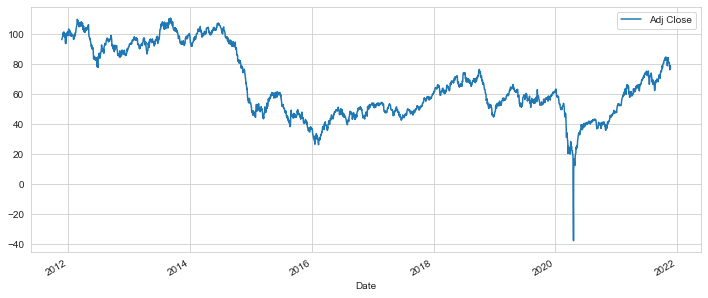

In [15]:
CL['Adj Close'].plot(legend=True,figsize=(12,5))

We see NZDCAD pair is negatively correlated with oil futrues. This means if NZDCAD gas a gain then the oil futures a loss. But according our data, it is not perfectly uncorrelated due to its distance to -1. There might seem some periods that both share the same market movement, yet in general the negative correlation presists as we see above that while NZDCAD yearly price went down the oil yearly price went down. 